## Nafactor - Classifierchain

In [6]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, hamming_loss, zero_one_loss
from skmultilearn.problem_transform import ClassifierChain
from catboost import CatBoostClassifier, Pool, CatBoost
from pandas import DataFrame
import csv

nafactor_train = pd.read_csv('C:/Users/iyuo1/OneDrive/Documents/P-SAT/주제분석/백신 주제/Label_encdoing/nafactor_train.csv')
nafactor_test = pd.read_csv('C:/Users/iyuo1/OneDrive/Documents/P-SAT/주제분석/백신 주제/Label_encdoing/nafactor_test.csv')

nafactor_train = nafactor_train.drop(['respondent_id','X'],axis=1)
nafactor_test = nafactor_test.drop(['respondent_id'], axis=1)
nafactor_test = np.array(nafactor_test)

y = nafactor_train[['h1n1_vaccine','seasonal_vaccine']]
x = nafactor_train.drop(['h1n1_vaccine','seasonal_vaccine'],axis=1)

y = np.array(y, dtype=float)
x = np.array(x, dtype=float)

classifier = ClassifierChain(CatBoostClassifier(random_state=1234))

train_x, val_x , train_y, val_y = train_test_split(x, y, test_size = 0.2)

classifier.fit(train_x, train_y)

Learning rate set to 0.038082
0:	learn: 0.6629611	total: 13ms	remaining: 13s
1:	learn: 0.6347365	total: 26.4ms	remaining: 13.2s
2:	learn: 0.6113707	total: 39.9ms	remaining: 13.3s
3:	learn: 0.5902069	total: 52.8ms	remaining: 13.2s
4:	learn: 0.5697218	total: 66.1ms	remaining: 13.2s
5:	learn: 0.5518474	total: 79.8ms	remaining: 13.2s
6:	learn: 0.5345065	total: 93.4ms	remaining: 13.2s
7:	learn: 0.5215962	total: 107ms	remaining: 13.3s
8:	learn: 0.5075177	total: 121ms	remaining: 13.4s
9:	learn: 0.4952032	total: 135ms	remaining: 13.4s
10:	learn: 0.4843497	total: 148ms	remaining: 13.3s
11:	learn: 0.4740414	total: 162ms	remaining: 13.3s
12:	learn: 0.4653212	total: 175ms	remaining: 13.2s
13:	learn: 0.4568402	total: 189ms	remaining: 13.3s
14:	learn: 0.4495204	total: 204ms	remaining: 13.4s
15:	learn: 0.4429703	total: 219ms	remaining: 13.5s
16:	learn: 0.4365467	total: 232ms	remaining: 13.4s
17:	learn: 0.4307315	total: 245ms	remaining: 13.4s
18:	learn: 0.4248977	total: 259ms	remaining: 13.4s
19:	lear

ClassifierChain(classifier=<catboost.core.CatBoostClassifier object at 0x000001F4E0D56CD0>,
                require_dense=[True, True])

In [7]:
test_y = classifier.predict_proba(nafactor_test)
test_y = test_y.toarray()
test_y = DataFrame(test_y)
test_y.columns = ['h1n1_vaccine', 'seasonal_vaccine']

pd.DataFrame(test_y).to_csv("C:/Users/iyuo1/OneDrive/Documents/P-SAT/주제분석/백신 주제/Label_encdoing/result_chain_nafactor.csv")

predictions = classifier.predict(val_x)

print("Accuracy = ",accuracy_score(val_y, predictions))
print("Hamming loss = ",hamming_loss(val_y, predictions))
print("zero_one_loss = ",zero_one_loss(val_y, predictions))

Accuracy =  0.6967427929614377
Hamming loss =  0.180456757768626
zero_one_loss =  0.3032572070385623


## KNN - Classifierchain

In [10]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, hamming_loss, zero_one_loss
from skmultilearn.problem_transform import ClassifierChain
from catboost import CatBoostClassifier, Pool, CatBoost, cv
from pandas import DataFrame
import csv

knn_train = pd.read_csv('C:/Users/iyuo1/OneDrive/Documents/P-SAT/주제분석/백신 주제/Label_encdoing/knn_train.csv')
knn_test = pd.read_csv('C:/Users/iyuo1/OneDrive/Documents/P-SAT/주제분석/백신 주제/Label_encdoing/knn_test.csv')

knn_train = knn_train.drop(['respondent_id'],axis=1)
knn_test = knn_test.drop(['respondent_id'], axis=1)
knn_test = np.array(knn_test, dtype = float)

y = knn_train[['h1n1_vaccine','seasonal_vaccine']]
x = knn_train.drop(['h1n1_vaccine','seasonal_vaccine'],axis=1)

x = np.array(x,dtype=float)
y = np.array(y,dtype=float)

train_x, val_x , train_y, val_y = train_test_split(x, y, test_size = 0.2)

classifier = ClassifierChain(CatBoostClassifier(random_state=1234))

classifier.fit(train_x, train_y)

Learning rate set to 0.038082
0:	learn: 0.6614133	total: 197ms	remaining: 3m 16s
1:	learn: 0.6342317	total: 214ms	remaining: 1m 46s
2:	learn: 0.6088901	total: 230ms	remaining: 1m 16s
3:	learn: 0.5868364	total: 245ms	remaining: 1m 1s
4:	learn: 0.5655908	total: 258ms	remaining: 51.4s
5:	learn: 0.5469995	total: 271ms	remaining: 44.9s
6:	learn: 0.5305686	total: 284ms	remaining: 40.3s
7:	learn: 0.5155421	total: 298ms	remaining: 37s
8:	learn: 0.5013871	total: 311ms	remaining: 34.3s
9:	learn: 0.4894121	total: 325ms	remaining: 32.2s
10:	learn: 0.4778758	total: 339ms	remaining: 30.5s
11:	learn: 0.4673286	total: 352ms	remaining: 29s
12:	learn: 0.4587639	total: 366ms	remaining: 27.8s
13:	learn: 0.4499808	total: 381ms	remaining: 26.8s
14:	learn: 0.4419414	total: 396ms	remaining: 26s
15:	learn: 0.4354750	total: 410ms	remaining: 25.2s
16:	learn: 0.4296361	total: 423ms	remaining: 24.5s
17:	learn: 0.4235993	total: 437ms	remaining: 23.8s
18:	learn: 0.4179245	total: 450ms	remaining: 23.3s
19:	learn: 0.4

ClassifierChain(classifier=<catboost.core.CatBoostClassifier object at 0x000002C71372A1C0>,
                require_dense=[True, True])

In [11]:
predictions = classifier.predict(val_x)

print("Accuracy = ",accuracy_score(val_y, predictions))
print("Hamming loss = ",hamming_loss(val_y, predictions))
print("zero_one_loss = ",zero_one_loss(val_y, predictions))

test_y = classifier.predict_proba(knn_test)
test_y = test_y.toarray()
test_y = DataFrame(test_y)
test_y.columns = ['h1n1_vaccine', 'seasonal_vaccine']

pd.DataFrame(test_y).to_csv("C:/Users/iyuo1/OneDrive/Documents/P-SAT/주제분석/백신 주제/Label_encdoing/result_chain_knn.csv")

Accuracy =  0.72163983526769
Hamming loss =  0.16473230999625607
zero_one_loss =  0.27836016473230996


## hotdeck - Classifierchain

In [10]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, hamming_loss, zero_one_loss
from skmultilearn.problem_transform import ClassifierChain
from catboost import CatBoostClassifier, Pool, CatBoost, cv
from pandas import DataFrame
import csv

hotdeck_train = pd.read_csv('C:/Users/iyuo1/OneDrive/Documents/P-SAT/주제분석/백신 주제/Label_encdoing/hotdeck_train.csv')
hotdeck_test = pd.read_csv('C:/Users/iyuo1/OneDrive/Documents/P-SAT/주제분석/백신 주제/Label_encdoing/hotdeck_test.csv')

hotdeck_train = hotdeck_train.drop(['respondent_id','X'],axis=1)
hotdeck_test = hotdeck_test.drop(['respondent_id'], axis=1)
hotdeck_test = np.array(hotdeck_test, dtype=float)

y = hotdeck_train[['h1n1_vaccine','seasonal_vaccine']]
x = hotdeck_train.drop(['h1n1_vaccine','seasonal_vaccine'],axis=1)

x = np.array(x,dtype=float)
y = np.array(y,dtype=float)
                     
train_x, val_x , train_y, val_y = train_test_split(x, y, test_size = 0.2)
                        
classifier = ClassifierChain(CatBoostClassifier(random_state=1234))
                        
classifier.fit(train_x, train_y) 

Learning rate set to 0.038082
0:	learn: 0.6665622	total: 16ms	remaining: 15.9s
1:	learn: 0.6425632	total: 31ms	remaining: 15.5s
2:	learn: 0.6199332	total: 46.1ms	remaining: 15.3s
3:	learn: 0.6001532	total: 61.2ms	remaining: 15.2s
4:	learn: 0.5821389	total: 75.7ms	remaining: 15.1s
5:	learn: 0.5660374	total: 89.2ms	remaining: 14.8s
6:	learn: 0.5512100	total: 103ms	remaining: 14.7s
7:	learn: 0.5374027	total: 117ms	remaining: 14.5s
8:	learn: 0.5248009	total: 132ms	remaining: 14.5s
9:	learn: 0.5133153	total: 146ms	remaining: 14.5s
10:	learn: 0.5043891	total: 169ms	remaining: 15.2s
11:	learn: 0.4957567	total: 199ms	remaining: 16.4s
12:	learn: 0.4872316	total: 214ms	remaining: 16.3s
13:	learn: 0.4795735	total: 230ms	remaining: 16.2s
14:	learn: 0.4729619	total: 261ms	remaining: 17.1s
15:	learn: 0.4663284	total: 275ms	remaining: 16.9s
16:	learn: 0.4603530	total: 289ms	remaining: 16.7s
17:	learn: 0.4550317	total: 302ms	remaining: 16.5s
18:	learn: 0.4503033	total: 316ms	remaining: 16.3s
19:	learn

ClassifierChain(classifier=<catboost.core.CatBoostClassifier object at 0x000001F4E0D569D0>,
                require_dense=[True, True])

In [11]:
predictions = classifier.predict(val_x)

print("Accuracy = ",accuracy_score(val_y, predictions))
print("Hamming loss = ",hamming_loss(val_y, predictions))
print("zero_one_loss = ",zero_one_loss(val_y, predictions))

test_y = classifier.predict_proba(hotdeck_test)
test_y = test_y.toarray()
test_y = DataFrame(test_y)
test_y.columns = ['h1n1_vaccine', 'seasonal_vaccine']

pd.DataFrame(test_y).to_csv("C:/Users/iyuo1/OneDrive/Documents/P-SAT/주제분석/백신 주제/Label_encdoing/result_chain_hotdeck.csv")

Accuracy =  0.6832646948708349
Hamming loss =  0.19028453762635716
zero_one_loss =  0.31673530512916515


## mice - Classifierchain

In [12]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, hamming_loss, zero_one_loss
from skmultilearn.problem_transform import ClassifierChain
from catboost import CatBoostClassifier, Pool, CatBoost, cv
from pandas import DataFrame
import csv

mice_train = pd.read_csv('C:/Users/iyuo1/OneDrive/Documents/P-SAT/주제분석/백신 주제/Label_encdoing/mice_train.csv')
mice_test = pd.read_csv('C:/Users/iyuo1/OneDrive/Documents/P-SAT/주제분석/백신 주제/Label_encdoing/mice_test.csv')

mice_train = mice_train.drop(['respondent_id'],axis=1)
mice_test = mice_test.drop(['respondent_id'], axis=1)
mice_test = np.array(mice_test, dtype=float)


y = mice_train[['h1n1_vaccine','seasonal_vaccine']]
x = mice_train.drop(['h1n1_vaccine','seasonal_vaccine'],axis=1)

x = np.array(x,dtype=float)
y = np.array(y,dtype=float)

train_x, val_x , train_y, val_y = train_test_split(x, y, test_size = 0.2)

classifier = ClassifierChain(CatBoostClassifier(random_state=1234))

classifier.fit(train_x, train_y)

Learning rate set to 0.038082
0:	learn: 0.6654780	total: 15.1ms	remaining: 15.1s
1:	learn: 0.6407900	total: 30.6ms	remaining: 15.3s
2:	learn: 0.6182438	total: 45ms	remaining: 15s
3:	learn: 0.5978378	total: 59.3ms	remaining: 14.8s
4:	learn: 0.5794160	total: 72.7ms	remaining: 14.5s
5:	learn: 0.5627127	total: 86.1ms	remaining: 14.3s
6:	learn: 0.5476278	total: 100ms	remaining: 14.2s
7:	learn: 0.5335226	total: 115ms	remaining: 14.3s
8:	learn: 0.5206018	total: 130ms	remaining: 14.3s
9:	learn: 0.5088888	total: 144ms	remaining: 14.2s
10:	learn: 0.4996744	total: 158ms	remaining: 14.2s
11:	learn: 0.4907165	total: 171ms	remaining: 14.1s
12:	learn: 0.4819219	total: 200ms	remaining: 15.2s
13:	learn: 0.4751453	total: 210ms	remaining: 14.8s
14:	learn: 0.4677184	total: 224ms	remaining: 14.7s
15:	learn: 0.4619548	total: 234ms	remaining: 14.4s
16:	learn: 0.4557878	total: 259ms	remaining: 15s
17:	learn: 0.4505453	total: 274ms	remaining: 14.9s
18:	learn: 0.4451058	total: 304ms	remaining: 15.7s
19:	learn: 

ClassifierChain(classifier=<catboost.core.CatBoostClassifier object at 0x000001F4DC849BB0>,
                require_dense=[True, True])

In [13]:
predictions = classifier.predict(val_x)

print("Accuracy = ",accuracy_score(val_y, predictions))
print("Hamming loss = ",hamming_loss(val_y, predictions))
print("zero_one_loss = ",zero_one_loss(val_y, predictions))

test_y = classifier.predict_proba(mice_test)
test_y = test_y.toarray()
test_y = DataFrame(test_y)
test_y.columns = ['h1n1_vaccine', 'seasonal_vaccine']

pd.DataFrame(test_y).to_csv("C:/Users/iyuo1/OneDrive/Documents/P-SAT/주제분석/백신 주제/Label_encdoing/result_chain_mice.csv")

Accuracy =  0.6827031074503931
Hamming loss =  0.1922500935979034
zero_one_loss =  0.3172968925496069


## Nafactor - LabelPowerset

In [15]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, hamming_loss, zero_one_loss
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from catboost import CatBoostClassifier, Pool, CatBoost
from pandas import DataFrame
import csv

nafactor_train = pd.read_csv('C:/Users/iyuo1/OneDrive/Documents/P-SAT/주제분석/백신 주제/Label_encdoing/nafactor_train.csv')
nafactor_test = pd.read_csv('C:/Users/iyuo1/OneDrive/Documents/P-SAT/주제분석/백신 주제/Label_encdoing/nafactor_test.csv')

nafactor_train = nafactor_train.drop(['respondent_id','X'],axis=1)
nafactor_test = nafactor_test.drop(['respondent_id'], axis=1)
nafactor_test = np.array(nafactor_test)

classifier = LabelPowerset(CatBoostClassifier(random_state=1234)) 

y = nafactor_train[['h1n1_vaccine','seasonal_vaccine']]
x = nafactor_train.drop(['h1n1_vaccine','seasonal_vaccine'],axis=1)

y = np.array(y, dtype=float)
x = np.array(x, dtype=float)

train_x, val_x , train_y, val_y = train_test_split(x, y, test_size = 0.2, random_state=1234)

classifier.fit(train_x, train_y)

Learning rate set to 0.092499
0:	learn: 1.2965558	total: 16.5ms	remaining: 16.5s
1:	learn: 1.2273007	total: 32.6ms	remaining: 16.2s
2:	learn: 1.1696886	total: 48.2ms	remaining: 16s
3:	learn: 1.1264357	total: 63.3ms	remaining: 15.8s
4:	learn: 1.0875592	total: 77ms	remaining: 15.3s
5:	learn: 1.0541559	total: 91.1ms	remaining: 15.1s
6:	learn: 1.0281440	total: 103ms	remaining: 14.7s
7:	learn: 1.0035269	total: 118ms	remaining: 14.6s
8:	learn: 0.9825886	total: 131ms	remaining: 14.4s
9:	learn: 0.9645346	total: 143ms	remaining: 14.2s
10:	learn: 0.9481065	total: 158ms	remaining: 14.2s
11:	learn: 0.9337207	total: 172ms	remaining: 14.2s
12:	learn: 0.9200883	total: 189ms	remaining: 14.4s
13:	learn: 0.9065740	total: 205ms	remaining: 14.4s
14:	learn: 0.8952825	total: 219ms	remaining: 14.4s
15:	learn: 0.8852154	total: 233ms	remaining: 14.3s
16:	learn: 0.8768280	total: 245ms	remaining: 14.2s
17:	learn: 0.8691362	total: 258ms	remaining: 14.1s
18:	learn: 0.8618297	total: 270ms	remaining: 13.9s
19:	learn

LabelPowerset(classifier=<catboost.core.CatBoostClassifier object at 0x000001F4DC8496D0>,
              require_dense=[True, True])

In [16]:
#val_x = val_x.ravel()
#predictions = classifier.predict(val_x)
#predictions = classifier.predict(nafactor_test)
test_y = classifier.predict_proba(nafactor_test)
test_y = test_y.toarray()
test_y = DataFrame(test_y)
test_y.columns = ['h1n1_vaccine', 'seasonal_vaccine']

pd.DataFrame(test_y).to_csv("C:/Users/iyuo1/OneDrive/Documents/P-SAT/주제분석/백신 주제/Label_encdoing/result_powerset_nafactor.csv")
#classes = list(unique_labels(y_true, y_pred))

#print("Accuracy = ",accuracy_score(val_y, predictions))
#print("Hamming loss = ",hamming_loss(val_y, predictions))
#print("zero_one_loss = ",zero_one_loss(val_y, predictions))

In [13]:
classifier.get_params().keys()

dict_keys(['classifier', 'require_dense'])

In [17]:
classifier.get_params().keys()

dict_keys(['classifier', 'require_dense', 'order'])

In [10]:
import lightgbm as lgbm
from lightgbm import LGBMModel,LGBMRegressor
classifier = ClassifierChain(lgbm.LGBMClassifier())

In [12]:
classifier.get_params().keys()

dict_keys(['classifier', 'classifier__boosting_type', 'classifier__class_weight', 'classifier__colsample_bytree', 'classifier__importance_type', 'classifier__learning_rate', 'classifier__max_depth', 'classifier__min_child_samples', 'classifier__min_child_weight', 'classifier__min_split_gain', 'classifier__n_estimators', 'classifier__n_jobs', 'classifier__num_leaves', 'classifier__objective', 'classifier__random_state', 'classifier__reg_alpha', 'classifier__reg_lambda', 'classifier__silent', 'classifier__subsample', 'classifier__subsample_for_bin', 'classifier__subsample_freq', 'require_dense', 'order'])

## knn - LabelPowerset

In [4]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, hamming_loss, zero_one_loss
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from catboost import CatBoostClassifier, Pool, CatBoost
from pandas import DataFrame
import csv

knn_train = pd.read_csv('C:/Users/iyuo1/OneDrive/Documents/P-SAT/주제분석/백신 주제/Label_encdoing/knn_train.csv')
knn_test = pd.read_csv('C:/Users/iyuo1/OneDrive/Documents/P-SAT/주제분석/백신 주제/Label_encdoing/knn_test.csv')

knn_train = knn_train.drop(['respondent_id'],axis=1)
knn_test = knn_test.drop(['respondent_id'], axis=1)
knn_test = np.array(knn_test)

classifier = LabelPowerset(CatBoostClassifier(random_state=1234)) 

y = knn_train[['h1n1_vaccine','seasonal_vaccine']]
x = knn_train.drop(['h1n1_vaccine','seasonal_vaccine'],axis=1)

y = np.array(y, dtype=float)
x = np.array(x, dtype=float)

train_x, val_x , train_y, val_y = train_test_split(x, y, test_size = 0.2, random_state=1234)

classifier.fit(train_x, train_y)

Learning rate set to 0.092499
0:	learn: 1.2852296	total: 156ms	remaining: 2m 36s
1:	learn: 1.2134733	total: 173ms	remaining: 1m 26s
2:	learn: 1.1559260	total: 194ms	remaining: 1m 4s
3:	learn: 1.1079410	total: 214ms	remaining: 53.3s
4:	learn: 1.0687377	total: 234ms	remaining: 46.5s
5:	learn: 1.0338881	total: 252ms	remaining: 41.8s
6:	learn: 1.0042466	total: 270ms	remaining: 38.3s
7:	learn: 0.9777136	total: 292ms	remaining: 36.2s
8:	learn: 0.9551383	total: 312ms	remaining: 34.3s
9:	learn: 0.9375436	total: 328ms	remaining: 32.5s
10:	learn: 0.9200036	total: 345ms	remaining: 31s
11:	learn: 0.9044659	total: 361ms	remaining: 29.8s
12:	learn: 0.8927152	total: 378ms	remaining: 28.7s
13:	learn: 0.8817291	total: 399ms	remaining: 28.1s
14:	learn: 0.8708317	total: 421ms	remaining: 27.6s
15:	learn: 0.8619519	total: 442ms	remaining: 27.2s
16:	learn: 0.8523614	total: 463ms	remaining: 26.8s
17:	learn: 0.8453311	total: 482ms	remaining: 26.3s
18:	learn: 0.8378786	total: 501ms	remaining: 25.9s
19:	learn: 

LabelPowerset(classifier=<catboost.core.CatBoostClassifier object at 0x000002299AD88D30>,
              require_dense=[True, True])

In [5]:
test_y = classifier.predict_proba(knn_test)
test_y = test_y.toarray()
test_y = DataFrame(test_y)
test_y.columns = ['h1n1_vaccine', 'seasonal_vaccine']

pd.DataFrame(test_y).to_csv("C:/Users/iyuo1/OneDrive/Documents/P-SAT/주제분석/백신 주제/Label_encdoing/result_powerset_knn.csv")

## hotdeck - LabelPowerset

In [6]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, hamming_loss, zero_one_loss
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from catboost import CatBoostClassifier, Pool, CatBoost
from pandas import DataFrame
import csv

hotdeck_train = pd.read_csv('C:/Users/iyuo1/OneDrive/Documents/P-SAT/주제분석/백신 주제/Label_encdoing/hotdeck_train.csv')
hotdeck_test = pd.read_csv('C:/Users/iyuo1/OneDrive/Documents/P-SAT/주제분석/백신 주제/Label_encdoing/hotdeck_test.csv')

hotdeck_train = hotdeck_train.drop(['respondent_id', 'X'],axis=1)
hotdeck_test = hotdeck_test.drop(['respondent_id'], axis=1)
hotdeck_test = np.array(hotdeck_test)

classifier = LabelPowerset(CatBoostClassifier(random_state=1234)) 

y = hotdeck_train[['h1n1_vaccine','seasonal_vaccine']]
x = hotdeck_train.drop(['h1n1_vaccine','seasonal_vaccine'],axis=1)

y = np.array(y, dtype=float)
x = np.array(x, dtype=float)

train_x, val_x , train_y, val_y = train_test_split(x, y, test_size = 0.2, random_state=1234)

classifier.fit(train_x, train_y)

Learning rate set to 0.092499
0:	learn: 1.2958017	total: 16.5ms	remaining: 16.5s
1:	learn: 1.2307627	total: 34.6ms	remaining: 17.3s
2:	learn: 1.1764176	total: 52.2ms	remaining: 17.4s
3:	learn: 1.1297393	total: 72.2ms	remaining: 18s
4:	learn: 1.0921411	total: 91.1ms	remaining: 18.1s
5:	learn: 1.0600310	total: 107ms	remaining: 17.7s
6:	learn: 1.0326404	total: 122ms	remaining: 17.3s
7:	learn: 1.0109875	total: 144ms	remaining: 17.9s
8:	learn: 0.9913336	total: 161ms	remaining: 17.7s
9:	learn: 0.9718750	total: 180ms	remaining: 17.8s
10:	learn: 0.9562487	total: 199ms	remaining: 17.9s
11:	learn: 0.9419852	total: 218ms	remaining: 17.9s
12:	learn: 0.9291287	total: 233ms	remaining: 17.7s
13:	learn: 0.9184724	total: 257ms	remaining: 18.1s
14:	learn: 0.9088406	total: 272ms	remaining: 17.9s
15:	learn: 0.9011126	total: 288ms	remaining: 17.7s
16:	learn: 0.8931727	total: 303ms	remaining: 17.5s
17:	learn: 0.8863420	total: 318ms	remaining: 17.4s
18:	learn: 0.8798612	total: 334ms	remaining: 17.2s
19:	lear

LabelPowerset(classifier=<catboost.core.CatBoostClassifier object at 0x00000229975B5C10>,
              require_dense=[True, True])

In [7]:
test_y = classifier.predict_proba(hotdeck_test)
test_y = test_y.toarray()
test_y = DataFrame(test_y)
test_y.columns = ['h1n1_vaccine', 'seasonal_vaccine']

pd.DataFrame(test_y).to_csv("C:/Users/iyuo1/OneDrive/Documents/P-SAT/주제분석/백신 주제/Label_encdoing/result_powerset_hotdeck.csv")

## mice - LabelPowerset

In [8]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, hamming_loss, zero_one_loss
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from catboost import CatBoostClassifier, Pool, CatBoost
from pandas import DataFrame
import csv

mice_train = pd.read_csv('C:/Users/iyuo1/OneDrive/Documents/P-SAT/주제분석/백신 주제/Label_encdoing/mice_train.csv')
mice_test = pd.read_csv('C:/Users/iyuo1/OneDrive/Documents/P-SAT/주제분석/백신 주제/Label_encdoing/mice_test.csv')

mice_train = mice_train.drop(['respondent_id'],axis=1)
mice_test = mice_test.drop(['respondent_id'], axis=1)
mice_test = np.array(mice_test)

classifier = LabelPowerset(CatBoostClassifier(random_state=1234)) 

y = mice_train[['h1n1_vaccine','seasonal_vaccine']]
x = mice_train.drop(['h1n1_vaccine','seasonal_vaccine'],axis=1)

y = np.array(y, dtype=float)
x = np.array(x, dtype=float)

train_x, val_x , train_y, val_y = train_test_split(x, y, test_size = 0.2, random_state=1234)

classifier.fit(train_x, train_y)

Learning rate set to 0.092499
0:	learn: 1.2930518	total: 16.3ms	remaining: 16.3s
1:	learn: 1.2250455	total: 30.5ms	remaining: 15.2s
2:	learn: 1.1687950	total: 45.2ms	remaining: 15s
3:	learn: 1.1215322	total: 60.3ms	remaining: 15s
4:	learn: 1.0827182	total: 75.9ms	remaining: 15.1s
5:	learn: 1.0509779	total: 90.6ms	remaining: 15s
6:	learn: 1.0228305	total: 108ms	remaining: 15.4s
7:	learn: 1.0004473	total: 137ms	remaining: 17s
8:	learn: 0.9796943	total: 157ms	remaining: 17.3s
9:	learn: 0.9617004	total: 172ms	remaining: 17s
10:	learn: 0.9469076	total: 212ms	remaining: 19.1s
11:	learn: 0.9320194	total: 228ms	remaining: 18.8s
12:	learn: 0.9189873	total: 243ms	remaining: 18.4s
13:	learn: 0.9084949	total: 267ms	remaining: 18.8s
14:	learn: 0.8982305	total: 288ms	remaining: 18.9s
15:	learn: 0.8904055	total: 319ms	remaining: 19.6s
16:	learn: 0.8824619	total: 366ms	remaining: 21.2s
17:	learn: 0.8755188	total: 384ms	remaining: 20.9s
18:	learn: 0.8687810	total: 405ms	remaining: 20.9s
19:	learn: 0.86

LabelPowerset(classifier=<catboost.core.CatBoostClassifier object at 0x00000229975A2C10>,
              require_dense=[True, True])

In [1]:
test_y = classifier.predict_proba(mice_test)
test_y = test_y.toarray()
test_y = DataFrame(test_y)
test_y.columns = ['h1n1_vaccine', 'seasonal_vaccine']

pd.DataFrame(test_y).to_csv("C:/Users/iyuo1/OneDrive/Documents/P-SAT/주제분석/백신 주제/Label_encdoing/result_powerset_mice.csv")

NameError: name 'classifier' is not defined

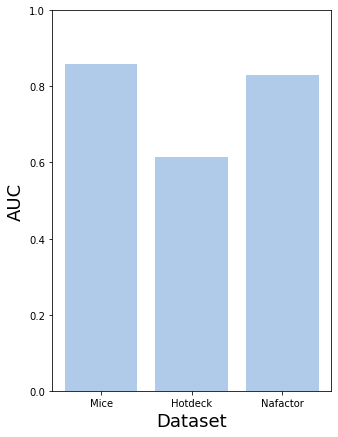

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

label=['Mice','Hotdeck','Nafactor']
length=[0.8588,0.6141, 0.8287]

fig,axs=plt.subplots(figsize=(5,7))
plt.bar(label,length,color='#6397D6',alpha=0.5)
plt.xlabel('Dataset', fontsize=18)
plt.ylabel('AUC', fontsize=18)
plt.ylim(0,1)
plt.show()